In [17]:
from sciml.model.deeponet import DeepONet
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.config.list_physical_devices('GPU')



[]

In [18]:
d_p = 64
d_V = 64
epochs = 100


In [19]:
internal_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(d_p,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(d_V, activation='relu'),
])


external_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(d_p, activation='relu'),
])

In [20]:
folder_path = "data/test_data/big_dataset_deeponet/heat2d/"

In [21]:
model = DeepONet(regular_params={"internal_model": internal_model, "external_model": external_model}, hyper_params={"d_p": d_p, "d_V": d_V,"device": "GPU","n_epochs":epochs})

2025-03-16 20:37:40,616 - sciml.model.deeponet.deeponet - INFO - Model initialized with 100 epochs, 32 batch size, 0.001 learning rate


In [22]:
mus, xs, sol = model.get_data(folder_path)

Loading y data: 100%|██████████| 32/32 [00:00<00:00, 4697.53it/s]


In [23]:
print(mus.shape)
print(xs.shape)
print(sol.shape)

(32, 64)
(32, 2560, 3)
(32, 2560)


In [24]:
loss_history_train,loss_history_test = model.fit()

Loading y data: 100%|██████████| 32/32 [00:00<00:00, 8403.84it/s]
2025-03-16 20:37:40.797057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [32,2560]
	 [[{{node Placeholder/_2}}]]
Training progress:   0%|          | 0/100 [00:00<?, ?it/s]2025-03-16 20:37:40.812829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype float and shape [26,2560]
	 [[{{node Placeholder/_2}}]]
2025-03-16 20:37:40.914086: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore 

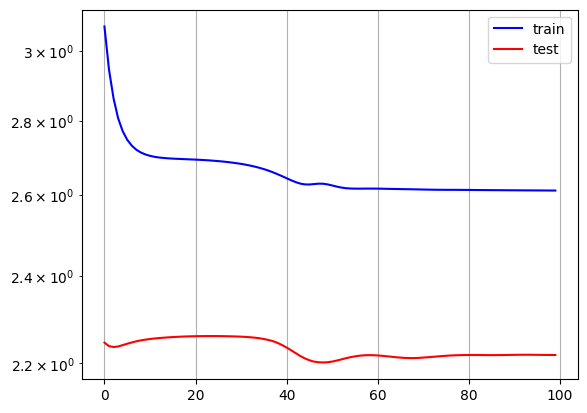

In [25]:
plt.plot(loss_history_train,color='blue')
plt.plot(loss_history_test,color='red')
plt.legend(['train','test'])
#log 
plt.yscale('log')
plt.grid()
plt.show()